Concatenating all of the CSV Files together to have an easier time handling all the data at once (excluding the median-rent dataset)

Problem: In the median_rent dataset there were towns that were duplicated because some ended with Spaces while some had no spaces, some 'KALLANG/WHAMPOA' were labelled as 'KALLANG/ WHAMPOA'
Solution: Loop through ['town'] and do .strip() to remove any whitespaces. Use the if condition to check if 'KALLANG' is in the current ['town'] iteration, then replace it with 'KALLANG/WHAMPOA'

In [217]:
import numpy as np
import matplotlib.pyplot as plt

# File paths for the CSV files
resale_1990_1999 = './resale-flat-price-CSVs/resale-flat-prices-based-on-approval-date-1990-1999.csv'
resale_2000_2012 = './resale-flat-price-CSVs/resale-flat-prices-based-on-approval-date-2000-feb-2012.csv'
resale_mar2012_dec2014 = './resale-flat-price-CSVs/resale-flat-prices-based-on-registration-date-from-mar-2012-to-dec-2014.csv'
resale_jan2015_dec2016 = './resale-flat-price-CSVs/resale-flat-prices-based-on-registration-date-from-jan-2015-to-dec-2016.csv'
resale_2017_onwards = './resale-flat-price-CSVs/resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv'
median_rent = './median-rent-by-town-and-flat-type/median-rent-by-town-and-flat-type.csv'
renting_out_flats = './renting-out-of-flats.csv'

# Load the datasets from CSV files
data1 = np.genfromtxt(resale_1990_1999, encoding=None, dtype=None, delimiter=',', names=True, usecols=("month", "town", "flat_type", "lease_commence_date", "resale_price"))
data2 = np.genfromtxt(resale_2000_2012, encoding=None, dtype=None, delimiter=',', names=True, usecols=("month", "town", "flat_type", "lease_commence_date", "resale_price"))
data3 = np.genfromtxt(resale_mar2012_dec2014, encoding=None, dtype=None, delimiter=',', names=True, usecols=("month", "town", "flat_type", "lease_commence_date", "resale_price"))
data4 = np.genfromtxt(resale_jan2015_dec2016, encoding=None, dtype=None, delimiter=',', names=True, usecols=("month", "town", "flat_type", "lease_commence_date", "resale_price"))
data5 = np.genfromtxt(resale_2017_onwards, encoding=None, dtype=None, delimiter=',', names=True, usecols=("month", "town", "flat_type", "lease_commence_date", "resale_price"))
data6 = np.genfromtxt(median_rent, encoding=None, dtype=None, delimiter=',', names=True, usecols=("quarter", "town", "flat_type", "median_rent"))
data7 = np.genfromtxt(renting_out_flats, encoding=None, dtype=None, delimiter=',', names=True, usecols=("rent_approval_date", "town", "flat_type", "monthly_rent"))

# Combine the datasets into one array
concatenated_data = np.concatenate((data1, data2, data3, data4, data5))

# Save the combined array to a new CSV file 
#Just used for checking
#np.savetxt('combined_data.csv', concatenated_data, delimiter=',', fmt='%s')

#Data sanitation
def sanitization_function():
    #counter = 0
    for i in range(len(concatenated_data)):
        concatenated_data[i]['town'] = concatenated_data[i]['town'].strip()

    for i in range(len(data6)):
        data6[i]['town'] = data6[i]['town'].strip()
        
        if 'KALLANG' in data6[i]['town']:
            data6[i]['town'] = 'KALLANG/WHAMPOA'

        if not data6[i]['median_rent'].isnumeric() or data6[i]['median_rent'] == 'na':
            data6[i]['median_rent'] = 'NA'
            
        # if ('2020' in data6[i]['quarter'] or '2021' in data6[i]['quarter'] or '2022' in data6[i]['quarter'] or '2023' in data6[i]['quarter']) and (data6[i]['median_rent'] == 'NA'):
        #    counter += 1
        # Used to debug amount of filtered out 'NA'
    #print(counter)
sanitization_function()

#Checks to see if the number of towns in the median_rent dataset corelates to the concatenated dataset
''' unique_towns = np.unique(concatenated_data['town'])
unique_towns2 = np.unique(data6['town'])
print(len(unique_towns))
print(len(unique_towns2)) '''


" unique_towns = np.unique(concatenated_data['town'])\nunique_towns2 = np.unique(data6['town'])\nprint(len(unique_towns))\nprint(len(unique_towns2)) "

Which flat type have the most recorded data amongst both Resale and calculated Median Rent?

Answer: Based on the displayed Pie Chart, it is shown that 4-ROOM Flat Types have the most amount of relevant data recorded. Thus, it would be the most optimal Flat Type that should be invested in

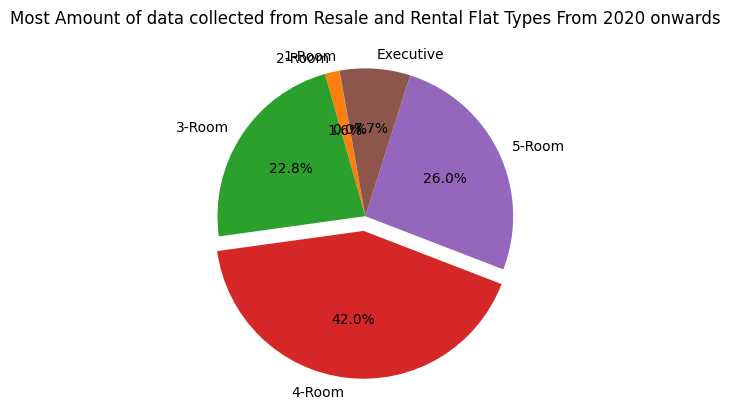

In [218]:
keyword1 = '1 ROOM'
keyword2 = '2 ROOM'
keyword3 = '3 ROOM'
keyword4 = '4 ROOM'
keyword5 = '5 ROOM'
keyword6 = 'EXECUTIVE'     


keyword7 = '1-RM'
keyword8 = '2-RM'
keyword9 = '3-RM'
keyword10 = '4-RM'
keyword11 = '5-RM'
keyword12 = 'EXEC'  

#data1
""" 
data1_1flat = data1[data1['flat_type'] == keyword1]
data1_2flat = data1[data1['flat_type'] == keyword2]
data1_3flat = data1[data1['flat_type'] == keyword3]
data1_4flat = data1[data1['flat_type'] == keyword4]
data1_5flat = data1[data1['flat_type'] == keyword5]
data1_Exec = data1[data1['flat_type'] == keyword6]  

#data2
data2_1flat = data2[data2['flat_type'] == keyword1]
data2_2flat = data2[data2['flat_type'] == keyword2]
data2_3flat = data2[data2['flat_type'] == keyword3]
data2_4flat = data2[data2['flat_type'] == keyword4]
data2_5flat = data2[data2['flat_type'] == keyword5]
data2_Exec = data2[data2['flat_type'] == keyword6]

#data3
data3_1flat = data3[data3['flat_type'] == keyword1]
data3_2flat = data3[data3['flat_type'] == keyword2]
data3_3flat = data3[data3['flat_type'] == keyword3]
data3_4flat = data3[data3['flat_type'] == keyword4]
data3_5flat = data3[data3['flat_type'] == keyword5]
data3_Exec = data3[data3['flat_type'] == keyword6] 

#data4
data4_1flat = data4[data4['flat_type'] == keyword1]
data4_2flat = data4[data4['flat_type'] == keyword2]
data4_3flat = data4[data4['flat_type'] == keyword3]
data4_4flat = data4[data4['flat_type'] == keyword4]
data4_5flat = data4[data4['flat_type'] == keyword5]
data4_Exec = data4[data4['flat_type'] == keyword6] """

#data5
''' data5_1flat = data5[data5['flat_type'] == keyword1]
data5_2flat = data5[data5['flat_type'] == keyword2]
data5_3flat = data5[data5['flat_type'] == keyword3]
data5_4flat = data5[data5['flat_type'] == keyword4]
data5_5flat = data5[data5['flat_type'] == keyword5]
data5_Exec = data5[data5['flat_type'] == keyword6] '''

#Only using data from 2020 and onwards because they are the most recent and relevant data

#data5
arr = []
for i in range(len(data5)):
    if '2020' in data5[i]['month'] or '2021' in data5[i]['month'] or '2022' in data5[i]['month']:
        arr.append(data5[i])
    else:
        i = i

np_arr = np.array(arr)

data5_1flat = np_arr[np_arr['flat_type'] == keyword1]
data5_2flat = np_arr[np_arr['flat_type'] == keyword2]
data5_3flat = np_arr[np_arr['flat_type'] == keyword3]
data5_4flat = np_arr[np_arr['flat_type'] == keyword4]
data5_5flat = np_arr[np_arr['flat_type'] == keyword5]
data5_Exec = np_arr[np_arr['flat_type'] == keyword6]

#data6
arr2 = []
for i in range(len(data6)):
    if ('2020' in data6[i]['quarter'] or '2021' in data6[i]['quarter'] or '2022' in data6[i]['quarter']) and (data6[i]['median_rent'] != 'NA'):
        arr2.append(data6[i])
    else:
        i = i

np_arr_2 = np.array(arr2)

data6_1flat = np_arr_2[np_arr_2['flat_type'] == keyword7]
data6_2flat = np_arr_2[np_arr_2['flat_type'] == keyword8]
data6_3flat = np_arr_2[np_arr_2['flat_type'] == keyword9]
data6_4flat = np_arr_2[np_arr_2['flat_type'] == keyword10]
data6_5flat = np_arr_2[np_arr_2['flat_type'] == keyword11]
data6_Exec = np_arr_2[np_arr_2['flat_type'] == keyword12]


total_1_room_flat_resales_and_median_rent_by_quarters = len(data5_1flat) + len(data6_1flat)
total_2_room_flat_resales_and_median_rent_by_quarters = len(data5_2flat) + len(data6_2flat)
total_3_room_flat_resales_and_median_rent_by_quarters = len(data5_3flat) + len(data6_3flat)
total_4_room_flat_resales_and_median_rent_by_quarters = len(data5_4flat) + len(data6_4flat)
total_5_room_flat_resales_and_median_rent_by_quarters = len(data5_5flat) + len(data6_5flat)
total_exec_room_flat_resales_and_median_rent_by_quarters = len(data5_Exec) + len(data6_Exec)


flat_types = ['1-Room', '2-Room','3-Room','4-Room','5-Room','Executive']
room_type_counts = [total_1_room_flat_resales_and_median_rent_by_quarters,total_2_room_flat_resales_and_median_rent_by_quarters,total_3_room_flat_resales_and_median_rent_by_quarters,total_4_room_flat_resales_and_median_rent_by_quarters,total_5_room_flat_resales_and_median_rent_by_quarters,total_exec_room_flat_resales_and_median_rent_by_quarters]
explode = [0,0,0,0.1,0,0]

plt.pie(room_type_counts, labels=flat_types, autopct='%1.1f%%', startangle=100, explode=explode)
plt.title('Most Amount of data collected from Resale and Rental Flat Types From 2020 onwards')
plt.show()

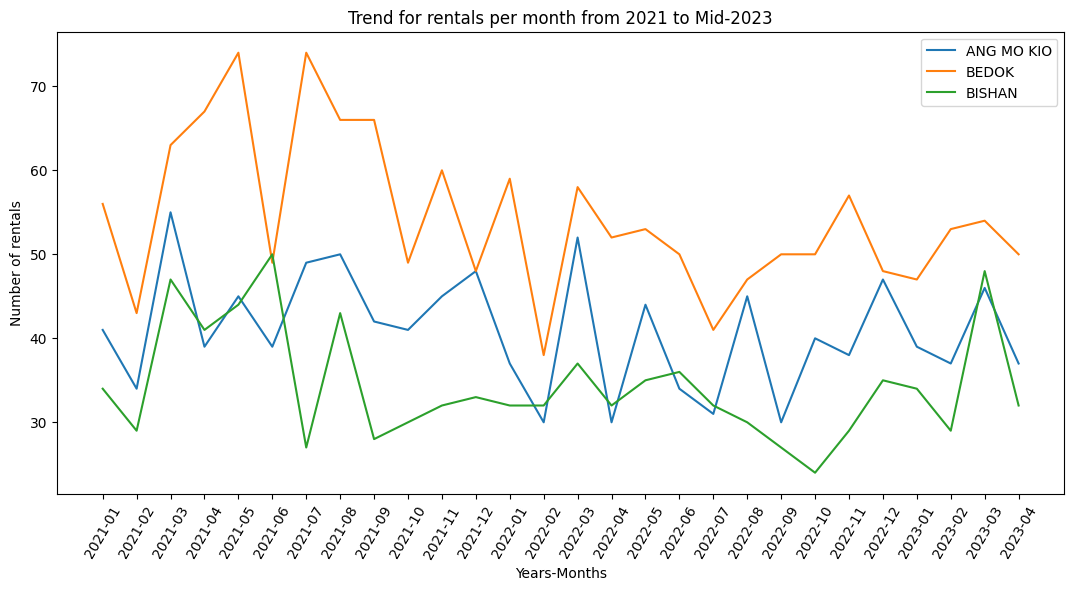

In [237]:

data7_np = np.array(data7)

dict = {}
dict2 = {}

towns = [
    'ANG MO KIO',
    'BEDOK',
    'BISHAN',
    'BUKIT BATOK',
    'BUKIT MERAH',
    'BUKIT PANJANG',
    'BUKIT TIMAH',
    'CENTRAL',
    'CHOA CHU KANG',
    'CLEMENTI',
    'GEYLANG',
    'HOUGANG',
    'JURONG EAST',
    'JURONG WEST',
    'KALLANG/WHAMPOA',
    'MARINE PARADE',
    'PASIR RIS',
    'PUNGGOL',
    'QUEENSTOWN',
    'SEMBAWANG',
    'SENGKANG',
    'SERANGOON',
    'TAMPINES',
    'TOA PAYOH',
    'WOODLANDS',
    'YISHUN'
]

x_label = 'Years-Months'
y_label = 'Number of rentals'
title = 'Trend for rentals per month from 2021 to Mid-2023'

plt.figure(figsize=(13,6))
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(title)
plt.xticks(rotation=60)

for town in towns:
    dict={}
    for item in data7_np:
        flat_type = item['flat_type']
        if town == item['town']:
            town = item['town']
            rent_approval_date = item['rent_approval_date']
            if (flat_type == '4-ROOM'):
                try:
                    lol = {rent_approval_date: dict[rent_approval_date] + 1}
                except:
                    lol = {rent_approval_date: 1}
                
                dict.update(lol)


    plt.plot(dict.keys(), dict.values())
    


plt.legend(towns)
plt.show()





